In [1]:
# importing the required libraries into our python environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings 
%matplotlib inline

In [2]:
tran=pd.read_csv('C:/Users/Skasiv/Dropbox/My PC (LAPTOP-L8J5JVJ8)/Desktop/case studies to solve/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv')
cust=pd.read_csv('C:/Users/Skasiv/Dropbox/My PC (LAPTOP-L8J5JVJ8)/Desktop/case studies to solve/Python Foundation Case Study 1 - Retail Case Study/Customer.csv')
prod_cat=pd.read_csv('C:/Users/Skasiv/Dropbox/My PC (LAPTOP-L8J5JVJ8)/Desktop/case studies to solve/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
merged=pd.merge(pd.merge(tran,cust,how='left',left_on='cust_id',right_on='customer_Id'),
                prod_cat,
                how='left',
                left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])

In [4]:
merged.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY


### 2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types

In [5]:
merged.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

### b. Top/Bottom 10 observations

In [6]:
merged.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [7]:
merged.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [8]:
def five_point(x):
     return pd.Series([x.min(),x.quantile(0.25),x.median(),x.quantile(0.75),x.max()],index=['min','Q1','median','Q3','max'])
    
merged.loc[:,['Qty','Rate','Tax','total_amt']].apply(lambda x: five_point(x))

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
Q1,1.0,312.0,98.280,762.450
median,3.0,710.0,199.080,1754.740
Q3,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


### d. Frequency tables for all the categorical variables

In [9]:

# using value_counts()
# for column in merged.loc[:,['Store_type','Gender','city_code','prod_cat','prod_subcat']]:
#     print(merged[column].value_counts())
 
for column in merged.loc[:,['Store_type','Gender','city_code','prod_cat','prod_subcat']].columns:
    print(merged.groupby([str(column)])[str(column)].count())
    print('\n')

Store_type
Flagship store    4577
MBR               4661
TeleShop          4504
e-Shop            9311
Name: Store_type, dtype: int64


Gender
F    11233
M    11811
Name: Gender, dtype: int64


city_code
1.0     2258
2.0     2270
3.0     2411
4.0     2422
5.0     2360
6.0     2127
7.0     2356
8.0     2330
9.0     2178
10.0    2333
Name: city_code, dtype: int64


prod_cat
Bags                1998
Books               6069
Clothing            2960
Electronics         4898
Footwear            2999
Home and kitchen    4129
Name: prod_cat, dtype: int64


prod_subcat
Academic                967
Audio and video         952
Bath                   1023
Cameras                 985
Children               1035
Comics                 1031
Computers               958
DIY                     989
Fiction                1043
Furnishing             1007
Kids                   1997
Kitchen                1037
Mens                   2912
Mobiles                1031
Non-Fiction            1004
Personal App

## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

# Histograms

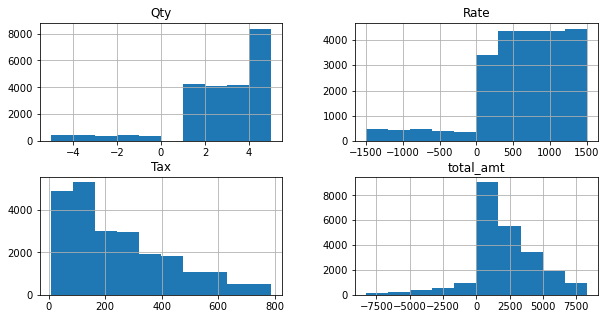

In [10]:
merged.loc[:,['Qty','Rate','Tax','total_amt']].hist(figsize=(10,5))
plt.show()

## Frequency Plots

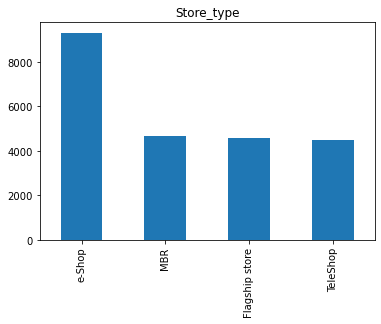

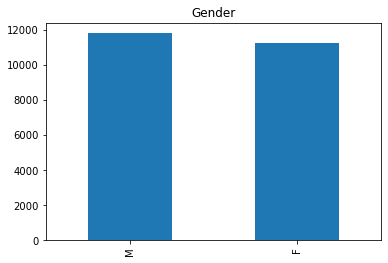

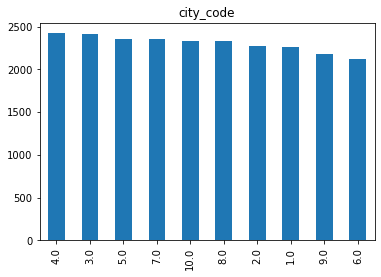

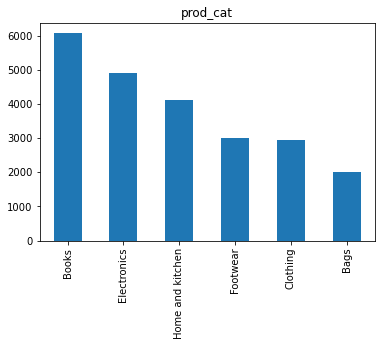

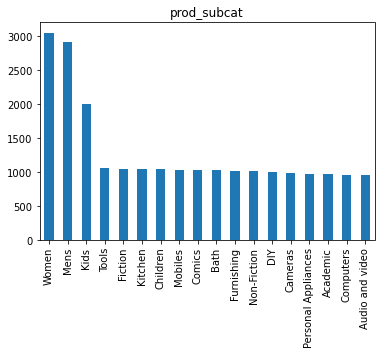

Store_type     None
Gender         None
city_code      None
prod_cat       None
prod_subcat    None
dtype: object

In [11]:
def barplotss(c):
    c.value_counts().plot(kind='bar',title=c.name)
    plt.show()
    
merged.loc[:,['Store_type','Gender','city_code','prod_cat','prod_subcat']].apply(lambda x : barplotss(x))

## 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [12]:
tr_date=pd.Series(merged.tran_date.apply(lambda x: x.replace('/', '-')))
tr_date=pd.to_datetime(tr_date,format='%d-%m-%Y')
print('start date :',tr_date.min().date())
print('end date :',tr_date.max().date())
print('difference in days :',(tr_date.max().date()-tr_date.min().date()).days)
print('difference in weeks :',(tr_date.max().date()-tr_date.min().date()).days//7)
print('difference in months :',(tr_date.max().year-tr_date.min().year)*12+(tr_date.max().month-tr_date.min().month))
print('difference in years :',round(((tr_date.max().date()-tr_date.min().date()).days)/365.25,2))

start date : 2011-01-25
end date : 2014-02-28
difference in days : 1130
difference in weeks : 161
difference in months : 37
difference in years : 3.09


### b. Count of transactions where the total amount of transaction was negative

In [13]:
merged[merged.total_amt<0].drop_duplicates().shape[0]

2164

## 5. Analyze which product categories are more popular among females vs male customers.

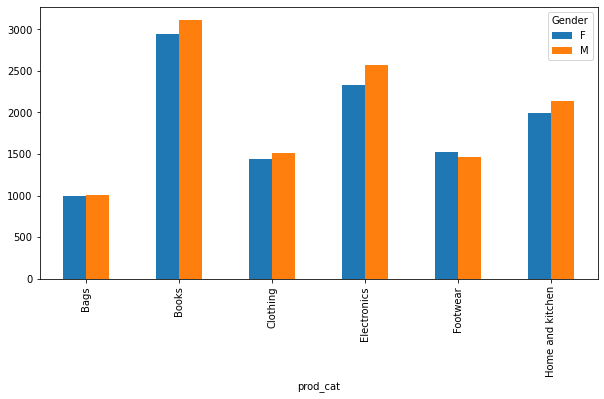

In [14]:

merged.pivot_table(index='Gender',columns='prod_cat',values='prod_cat_code',aggfunc='count').T.plot(kind='bar',figsize=(10,5))
plt.show()


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [15]:
cust_pop=cust.groupby('city_code')['customer_Id'].agg(['count'])
cust_pop['% population']=round(cust_pop['count']/cust.shape[0]*100,2)
cust_pop[cust_pop['count']==cust_pop['count'].max()]

,count,% population
city_code,,
3.0,595,10.54


## 7. Which store type sells the maximum products by value and by quantity?

In [16]:
warnings.simplefilter(action='ignore', category=FutureWarning)
summ_pro=merged.groupby('Store_type')['total_amt','Qty'].agg({'total_amt':'sum','Qty':'sum'})
summ_pro.loc[(summ_pro.total_amt==summ_pro.total_amt.max()) | (summ_pro.Qty==summ_pro.Qty.max())]


,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [17]:
merged[(merged.Store_type=='Flagship store') & (merged.prod_cat.isin(['Electronics','Clothing']))].pivot_table(index='Store_type',columns='prod_cat',values='total_amt',aggfunc='sum')

prod_cat,Clothing,Electronics
Store_type,,
Flagship store,1194423.23,2215136.04


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [18]:
merged[(merged.Gender=='M') & (merged.prod_cat.isin(['Electronics']))].pivot_table(index='prod_cat',columns='Gender',values='total_amt',aggfunc='sum')

Gender,M
prod_cat,
Electronics,5703109.425


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [19]:
tran_summ=merged[merged.total_amt>0].pivot_table(index='cust_id',values='transaction_id',aggfunc='count')
tran_summ[tran_summ['transaction_id']>10].shape[0]

6

## 11. For all customers aged between 25 - 35, find out:

In [20]:
# Type Conversion
merged['tran_date']=pd.to_datetime(pd.Series(merged.tran_date.apply(lambda x:x.replace('/','-'))),format='%d-%m-%Y')
merged['DOB']=pd.to_datetime(merged['DOB'],format='%d-%m-%Y')

In [21]:
# getting customers with age 25-35
distinct_customers=merged.groupby('cust_id')['tran_date','DOB'].agg({'tran_date':'max','DOB':'max'}).reset_index()
distinct_customers['age']=(distinct_customers['tran_date']-distinct_customers['DOB']).dt.days/365.25
customers=distinct_customers[(distinct_customers.age>=25) & (distinct_customers.age<=35)]
customers=customers.loc[:,'cust_id']

## a. What was the total amount spent for “Electronics” and “Books” product categories?

In [22]:
merged[(merged.cust_id.isin(customers)) & merged.prod_cat.isin(['Electronics','Books'])].groupby('prod_cat')['total_amt'].sum().to_frame()

,total_amt
prod_cat,
Books,5552663.675
Electronics,4706007.150


## b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [23]:
start=pd.to_datetime('01-01-2014',format='%d-%m-%Y')
end=pd.to_datetime('01-03-2014',format='%d-%m-%Y')
merged[(merged.cust_id.isin(customers)) & (merged.tran_date>=start) & (merged.tran_date<=end) ].total_amt.sum()

995938.71